# **BIMA BAYU SAPUTRA**
# **08 || 2141720019**
# **TI-3H**
# **UTS_KEL1**

# Import Libraries

In [88]:
import os
import cv2
import random
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fungsi Menampilkan Citra

In [89]:
# Fungsi untuk menampilkan citra
def show_images(images, titles, figsize=(15, 7)):
    plt.figure(figsize=figsize)
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Model K-Means

In [90]:
def kmeans_segmentation_color(image, k):
    # Ubah citra menjadi array 2D
    pixels = image.reshape(-1, 3).astype(np.float32)

    # Normalisasi nilai piksel
    pixels /= 255.0

    # Inisialisasi K-Means dengan k cluster
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    kmeans.fit(pixels)

    # Prediksi label setiap piksel
    labels = kmeans.predict(pixels)

    # Rekonstruksi citra hasil segmentasi
    segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)

    # Kembalikan citra hasil segmentasi
    segmented_image = (segmented_image * 255).astype(np.uint8)

    return segmented_image


In [91]:
def kmeans_segmentation_gray(image, k):
    # Ubah citra grayscale menjadi array 2D
    pixels = image.reshape(-1, 1).astype(np.float32)

    # Inisialisasi K-Means dengan k cluster
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=0)
    kmeans.fit(pixels)

    # Prediksi label setiap piksel
    labels = kmeans.predict(pixels)

    # Rekonstruksi citra hasil segmentasi
    segmented_image = kmeans.cluster_centers_[labels].reshape(image.shape)

    # Kembalikan citra hasil segmentasi
    return segmented_image

# Pembacaan Data Citra

In [92]:
# Direktori dataset
dataset_dir = 'data/img'

# Pilih 5 citra plat nomor secara acak dari seluruh dataset
all_image_files = []
for root, dirs, files in os.walk(dataset_dir):
    all_image_files.extend([os.path.join(root, file) for file in files])

# Pilih secara acak 5 citra plat nomor
selected_images = random.sample(all_image_files, 5)

# Cetak Data Citra

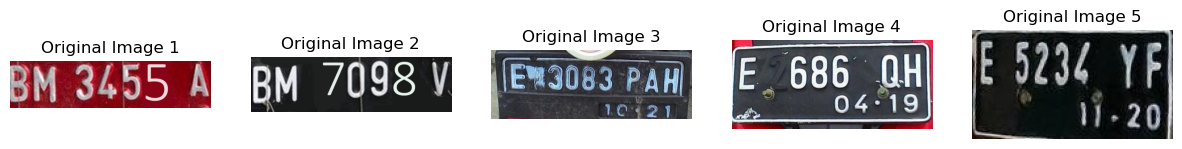

In [93]:
# Muat dan tampilkan citra-citra yang dipilih sebelum segmentasi
original_images = [cv2.imread(img) for img in selected_images]

# Menampilkan citra asli dengan judul "Original" (dalam format RGB)
fig, axes = plt.subplots(1, len(original_images), figsize=(15, 5))
for i, (ax, image) in enumerate(zip(axes, original_images), start=1):
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax.imshow(rgb_image)
    ax.set_title(f"Original Image {i}")
    ax.axis('off')
plt.show()

# Pre-Processing

## HSV

In [94]:
# Konversi ke ruang warna HSV
hsv_images = [cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in original_images]

## PCA

In [95]:
# Pra-pemrosesan: Reduksi dimensi menggunakan PCA
pca = PCA(n_components=3)
reduced_images = [pca.fit_transform(img.reshape((-1, 3))).reshape(img.shape) for img in original_images]

## Thresholding dan Smoothing (Gaussian blur) 

In [96]:
# Mengubah citra ke grayscale
gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in original_images]

# Kombinasi Thresholding dan Smoothing pada saluran kecerahan
preprocessed_images = [cv2.threshold(cv2.GaussianBlur(img, (5, 5), 0), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1] for img in gray_images]

## Citra setelah Preprosessing

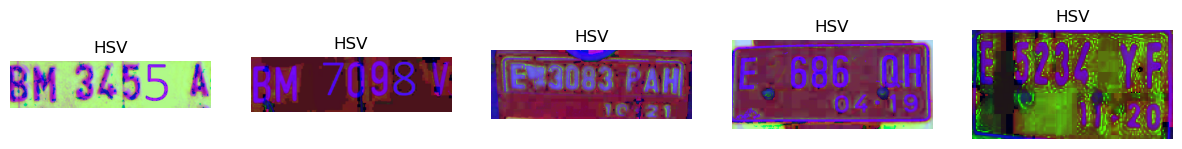

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


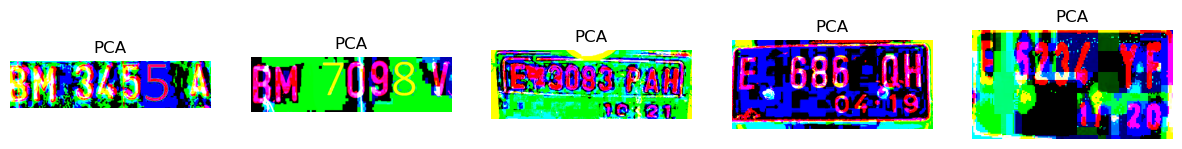

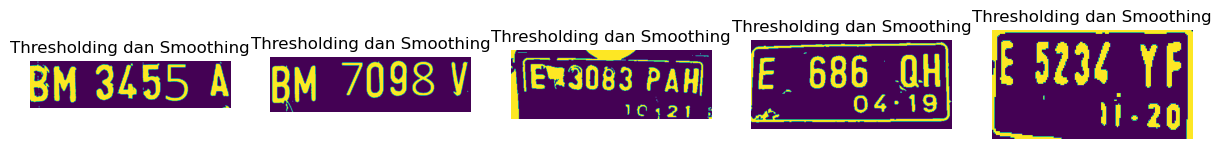

In [97]:
show_images(hsv_images, titles=['HSV']*len(hsv_images))
show_images(reduced_images, titles=['PCA']*len(reduced_images))
show_images(preprocessed_images, titles=['Thresholding dan Smoothing']*len(preprocessed_images))

# Proses Segmentasi

In [98]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_hsv = [kmeans_segmentation_color(img, 2) for img in hsv_images]

In [99]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_pca = [kmeans_segmentation_color(img, 2) for img in reduced_images]

In [100]:
# Lakukan segmentasi pada citra-citra yang telah di-preprocess
segmented_images_ts = [kmeans_segmentation_gray(img, 2) for img in preprocessed_images]

# Hasil Segementasi

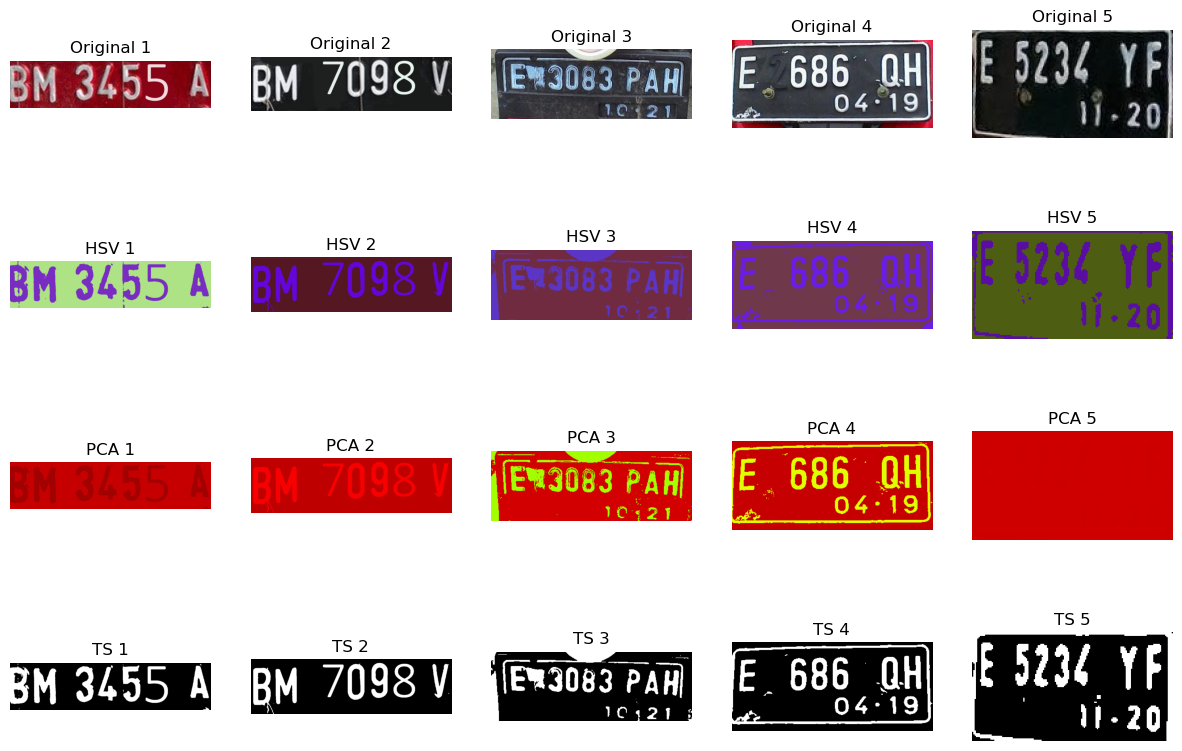

In [101]:
# Mengonversi citra-citra 8-bit kembali ke format asli (RGB)
segmented_images_rgb = [cv2.cvtColor(image, cv2.COLOR_BGR2RGB) if image.shape[2] == 3 else image for image in segmented_images_pca]

# Definisikan jumlah kolom untuk menampilkan citra-citra
num_columns = len(original_images)

# Buat subplot untuk menampilkan citra original dan hasil segmentasi dalam tiga format
fig, axes = plt.subplots(4, num_columns, figsize=(15, 10))

# Loop melalui citra-citra
for i, (original, segmented_hsv, segmented_pca, segmented_ts) in enumerate(zip(original_images, segmented_images_hsv, segmented_images_rgb, segmented_images_ts)):
    # Tampilkan citra original
    axes[0, i].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f'Original {i + 1}')
    axes[0, i].axis('off')

    # Tampilkan citra hasil segmentasi dalam format HSV
    axes[1, i].imshow(segmented_hsv, cmap='hsv')
    axes[1, i].set_title(f'HSV {i + 1}')
    axes[1, i].axis('off')

    # Tampilkan citra hasil segmentasi dalam format PCA
    axes[2, i].imshow(cv2.cvtColor(segmented_pca, cv2.COLOR_BGR2RGB))
    axes[2, i].set_title(f'PCA {i + 1}')
    axes[2, i].axis('off')
    
    # Tampilkan citra hasil segmentasi dalam format gray
    axes[3, i].imshow(segmented_ts, cmap='gray')
    axes[3, i].set_title(f'TS {i + 1}')
    axes[3, i].axis('off')

# Tampilkan subplot
plt.show()

# Evaluasi Hasil Segmentasi

In [102]:
import pytesseract
from Levenshtein import distance as lev_distance
from PIL import Image

## Model Evaluasi

In [103]:
# Fungsi untuk menghitung akurasi pengenalan karakter
def calculate_accuracy(ground_truth, recognized_text):
    correct_characters = sum(1 for gt_char, rec_char in zip(ground_truth, recognized_text) if gt_char == rec_char)
    total_characters = len(ground_truth)
    accuracy = correct_characters / total_characters * 100.0
    return accuracy

# Fungsi untuk menghitung Levenshtein distance
def calculate_levenshtein_distance(ground_truth, recognized_text):
    return lev_distance(ground_truth, recognized_text)

## Baca Data Citra Hasil Segmentasi

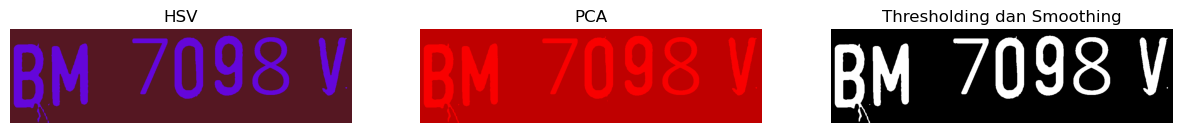

In [116]:
# Indeks citra yang akan dievaluasi
index_to_evaluate = 1

# Melakukan OCR untuk mengenali karakter
recognized_text1 = pytesseract.image_to_string(segmented_images_hsv[index_to_evaluate], lang='eng')
recognized_text2 = pytesseract.image_to_string(segmented_images_pca[index_to_evaluate], lang='eng')

# Mengonversi numpy.ndarray menjadi citra PIL
segmented_image_ts_pil = Image.fromarray(segmented_images_ts[index_to_evaluate])
# Kemudian, mengonversi citra PIL ke mode 'L' (grayscale)
segmented_image_ts_pil = segmented_image_ts_pil.convert('L')
# Selanjutnya, gunakan PyTesseract untuk mengenali teks pada citra
recognized_text3 = pytesseract.image_to_string(segmented_image_ts_pil, lang='eng')

# Definisikan judul untuk setiap citra
titles = ['HSV', 'PCA', 'Thresholding dan Smoothing']

# Definisikan citra-citra yang dievaluasi
images_to_display = [segmented_images_hsv[index_to_evaluate], segmented_images_pca[index_to_evaluate], segmented_images_ts[index_to_evaluate]]

# Definisikan format citra-citra yang akan ditampilkan
is_float = [False, False, True]

# Menampilkan citra-citra dengan judul yang sesuai
fig, axes = plt.subplots(1, len(images_to_display), figsize=(15, 4))
for i, (image, title, float_format) in enumerate(zip(images_to_display, titles, is_float)):
    if float_format:
        image = (image * 255).astype(np.uint8)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()


## Hitung akurasi

In [110]:
# Plat asli
ground_truth = 'BM 7098 V'

# Menghitung akurasi pengenalan karakter untuk recognized_text1
accuracy1 = calculate_accuracy(ground_truth, recognized_text1)

# Menghitung akurasi pengenalan karakter untuk recognized_text2
accuracy2 = calculate_accuracy(ground_truth, recognized_text2)

# Menghitung akurasi pengenalan karakter untuk recognized_text3
accuracy3 = calculate_accuracy(ground_truth, recognized_text3)

## Hitung Levenshtein distance

In [111]:
# Menghitung Levenshtein distance untuk recognized_text1
levenshtein_distance1 = calculate_levenshtein_distance(ground_truth, recognized_text1)

# Menghitung Levenshtein distance untuk recognized_text2
levenshtein_distance2 = calculate_levenshtein_distance(ground_truth, recognized_text2)

# Menghitung Levenshtein distance untuk recognized_text3
levenshtein_distance3 = calculate_levenshtein_distance(ground_truth, recognized_text3)

## Cetak Hasil Evaluasi

In [112]:
print(f'Ground Truth: {ground_truth}')
print("")
print(f'HSV: {recognized_text1}')
print(f'Akurasi HSV: {accuracy1:.2f}%')
print(f'Levenshtein Distance HSV: {levenshtein_distance1}')
print("")
print(f'PCA: {recognized_text2}')
print(f'Akurasi PCA: {accuracy2:.2f}%')
print(f'Levenshtein Distance PCA: {levenshtein_distance2}')
print("")
print(f'Thresholding dan Smoothing: {recognized_text3}')
print(f'Akurasi PCA: {accuracy3:.2f}%')
print(f'Levenshtein Distance PCA: {levenshtein_distance3}')

Ground Truth: BM 7098 V

HSV: BM 7098 V

Akurasi HSV: 100.00%
Levenshtein Distance HSV: 1

PCA: BM 7098 V

Akurasi PCA: 100.00%
Levenshtein Distance PCA: 1

Thresholding dan Smoothing: BM 7098 V

Akurasi PCA: 100.00%
Levenshtein Distance PCA: 1
